In [24]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt
import yfinance as yf

In [35]:
# Coleta da taxa de retorno risk free

def deannualize(annual_rate, periods=365):
    return (1 + annual_rate) ** (1/periods) - 1

annualized = yf.download("^IRX", start="1991-06-01", end="2015-12-31")["Adj Close"]
daily = annualized.apply(deannualize)

# create dataframe
risk_free_rates = pd.DataFrame({"annualized": annualized, "daily": daily})
risk_free_rates['daily'] = risk_free_rates['daily'] / 100
print(np.shape(risk_free_rates))
risk_free_rates.head()

[*********************100%***********************]  1 of 1 completed
(6168, 2)


,annualized,daily
Date,,
1991-06-03,5.60,0.000052
1991-06-04,5.57,0.000052
1991-06-05,5.59,0.000052
1991-06-06,5.56,0.000052
1991-06-07,5.56,0.000052


In [63]:
operations = pd.read_csv("../distance_results/operations_test.csv", index_col=0)
operations['Return'] = operations['Return'] - 1
print(operations.tail())

      Semester  Days   S1   S2     Pair    Return  Converged
2740        48     8  XEL  WEC  XEL-WEC  0.022778       True
2741        48     7  XEL  WEC  XEL-WEC  0.024433       True
2742        48    10  PNW  WEC  PNW-WEC  0.020942       True
2743        48     5  PNW  WEC  PNW-WEC  0.018191       True
2744        48   126  SPG  PSA  SPG-PSA -0.204372      False


In [64]:
print(f"Número de operações: {np.shape(operations)[0]}")
print(f"Converged operations: {sum(operations['Converged'])} | Open operations: {np.shape(operations)[0] - sum(operations['Converged'])}")
print(f"Positive Returns: {sum(operations['Return'] > 0)}")
print(f"Negative Returns: {sum(operations['Return'] < 0)}")
print(f"Highest Return: {operations['Return'].max()}")
print(f"Lowest Return: {operations['Return'].min()}")
print(f"Average Return: {operations['Return'].mean()}")
print(f"Average trade lenght: {operations['Days'].mean()}")

Número de operações: 2745
Converged operations: 2075 | Open operations: 670
Positive Returns: 2188
Negative Returns: 557
Highest Return: 0.2444590025207083
Lowest Return: -0.6340779177374505
Average Return: 0.0037692652148289692
Average trade lenght: 28.204007285974498


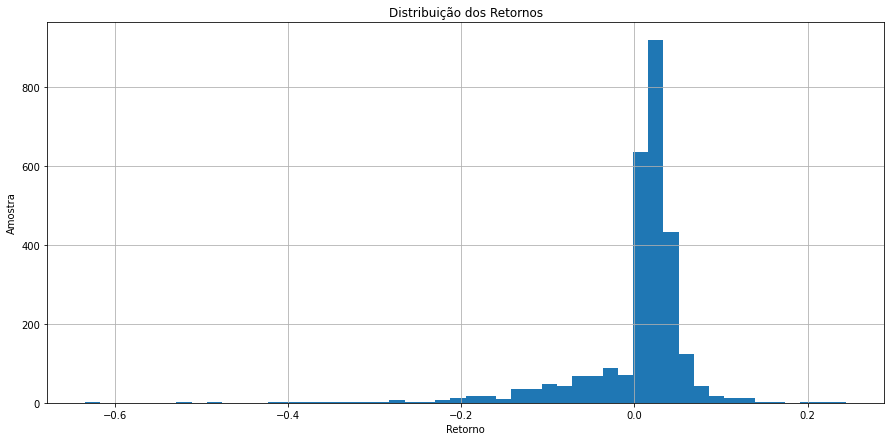

In [65]:
# Return Distribution
fig = plt.figure(figsize=(15, 7))
ax1 = fig.add_subplot(1, 1, 1)
operations['Return'].hist(bins=50, ax=ax1)
ax1.set_xlabel('Retorno')
ax1.set_ylabel('Amostra')
ax1.set_title('Distribuição dos Retornos')
plt.show()

In [66]:
# Retorno por par
operations_by_pair = operations.groupby("Pair").sum("Return")
print(f"Número de pares: {np.shape(operations_by_pair)[0]}")
print(f"Retorno médio por par: {round(100*operations_by_pair['Return'].mean(),4)}%")

Número de pares: 640
Retorno médio por par: 1.6167%


In [8]:
# Ações com maior participação
stock_count = {}

for pair in operations_by_pair.index:
    stocks = pair.split("-")
    for stock in stocks:   
        if stock in stock_count:
            stock_count[stock] += 1
        else:
            stock_count[stock] = 1
stock_count_df = pd.DataFrame(stock_count.items()) 
stock_count_df = stock_count_df.sort_values(1)
stock_count_df.to_csv("../distance_results/stock_count_20_pairs_test.csv")

In [43]:
# Leitura dos retornos diários dos portfólios e Retornos Risk-Free
daily_returns_cc = pd.read_csv("../distance_results/Rp_ew_cc_test.csv", header=0)
#daily_returns_cc.columns = ['Return', 'Semester']
print(daily_returns_cc)

risk_free_returns = pd.read_csv("../distance_results/risk_free.csv", header=0, index_col=0)
risk_free_returns.head()

        Return  Semester
0     0.000000       0.0
1    -0.000011       0.0
2     0.001460       0.0
3     0.000134       0.0
4     0.001018       0.0
...        ...       ...
6168  0.000000       0.0
6169  0.000000       0.0
6170  0.000000       0.0
6171  0.000000       0.0
6172  0.000000       0.0

[6173 rows x 2 columns]


,Return,Semester
0,0.000291,0.0
1,0.000291,0.0
2,0.000291,0.0
3,0.000291,0.0
4,0.000291,0.0


In [44]:
# Leitura dos retornos diários dos portfólios e Retornos Risk-Free
daily_returns_fi = pd.read_csv("../distance_results/Rp_vw_fi_test.csv", header=0)
#daily_returns_cc.columns = ['Return', 'Semester']
print(daily_returns_fi)

# Cálculo do Sharpe para o período do estudo
mean_daily_return_fi = daily_returns_fi['Return'].mean()
print(f"Mean daily return: {mean_daily_return_fi}")
returns_std_dev_fi = daily_returns_fi['Return'].std()

risk_free_mean = risk_free_rates['daily'].mean()
print(f"Mean risk free return: {risk_free_mean}")

print(f"Fully Invested Sharpe Ratio: {(mean_daily_return_fi - risk_free_mean) / returns_std_dev_fi}")

        Return  Semester
0     0.000000       0.0
1    -0.000053       0.0
2     0.005840       0.0
3     0.000445       0.0
4     0.004070       0.0
...        ...       ...
6168  0.000000       0.0
6169  0.000000       0.0
6170  0.000000       0.0
6171  0.000000       0.0
6172  0.000000       0.0

[6173 rows x 2 columns]
Mean daily return: 0.00015954108743655368
Mean risk free return: 2.9473073283260452e-05
Fully Invested Sharpe Ratio: 0.02772646226856696


In [45]:
# Cálculo do Sharpe para o período do estudo
mean_daily_return = daily_returns_cc['Return'].mean()
print(f"Mean daily return: {mean_daily_return}")
returns_std_dev = daily_returns_cc['Return'].std()

risk_free_mean = risk_free_rates['daily'].mean()
print(f"Mean risk free return: {risk_free_mean}")

print(f"Committed Capital Sharpe Ratio: {(mean_daily_return - risk_free_mean) / returns_std_dev}")

Mean daily return: 9.040820922114165e-05
Mean risk free return: 2.9473073283260452e-05
Committed Capital Sharpe Ratio: 0.02169676253706194


In [46]:
semester_returns = pd.read_csv("../distance_results/ret_acum_df_test.csv", header=0, index_col=0)
semester_returns.head()

,CC,FI,RMRF,SEMESTER
0,1.000000,1.000000,1.001433,0.0
1,0.999989,0.999947,0.988685,0.0
2,1.001449,1.005787,0.996014,0.0
3,1.001583,1.006235,0.998781,0.0
4,1.002602,1.010330,0.990073,0.0


In [47]:
semester_returns = semester_returns[semester_returns['RMRF'] != 0]
semester_cumulative_returns = semester_returns.groupby("SEMESTER").last() - 1
print(f"Retorno semestral médio: CC {semester_cumulative_returns['CC'].mean()*100} | FI {semester_cumulative_returns['FI'].mean()*100}")
print(f"Maior retorno: CC {semester_cumulative_returns['CC'].max()*100} | FI {semester_cumulative_returns['FI'].max()*100}")
print(f"Menor retorno: CC {semester_cumulative_returns['CC'].min()*100} | FI {semester_cumulative_returns['FI'].min()*100}")
print(f"Semestres positivos: CC {sum(semester_cumulative_returns['CC'] > 0)} | FI {sum(semester_cumulative_returns['FI'] > 0)}")
print(f"Semestres negativos: CC {sum(semester_cumulative_returns['CC'] < 0)}")
print(f"Retorno acumulado: {np.cumprod(1+semester_cumulative_returns)}")

Retorno semestral médio: CC 1.1712953803005202 | FI 2.1175531595078123
Maior retorno: CC 8.981744524266544 | FI 26.302834657718076
Menor retorno: CC -14.306103886231059 | FI -17.267744294694054
Semestres positivos: CC 34 | FI 31
Semestres negativos: CC 15
Retorno acumulado:                 CC        FI      RMRF
SEMESTER                              
0.0       1.036238  1.062705  0.876513
1.0       1.084458  1.140984  0.774019
2.0       1.139625  1.243413  0.678437
3.0       1.177103  1.319318  0.603301
4.0       1.138492  1.266341  0.528801
5.0       1.154233  1.287926  0.466476
6.0       1.199204  1.372966  0.413703
7.0       1.306913  1.734095  0.365327
8.0       1.360360  1.853655  0.322608
9.0       1.408186  1.952950  0.284884
10.0      1.417457  1.959315  0.249705
11.0      1.427588  2.015877  0.220274
12.0      1.548067  2.287158  0.193073
13.0      1.554865  2.314324  0.171691
14.0      1.491596  2.156692  0.150489
15.0      1.572599  2.307753  0.133822
16.0      1.493758  2.0

<AxesSubplot:>

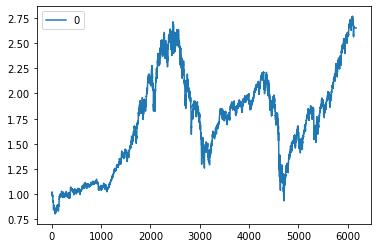

In [7]:
rmrf = pd.read_csv("../RmRf.csv", header=None)
rmrf_cumulative = np.cumprod(1+rmrf)
rmrf_cumulative.plot()

<AxesSubplot:>

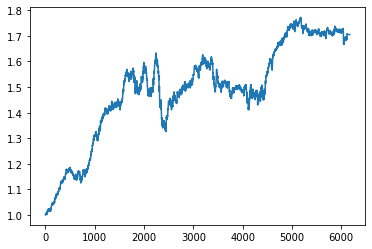

In [25]:
rp_ew_cc = pd.read_csv("../distance_results/Rp_ew_cc_test.csv")
rp_ew_cc_cumulative = np.cumprod(1+rp_ew_cc['Return'])
rp_ew_cc_cumulative.plot()

<AxesSubplot:>

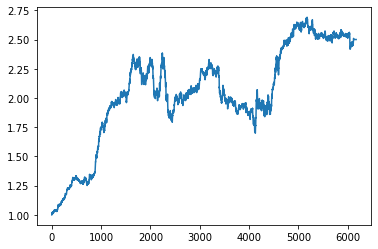

In [27]:
rp_vw_fi = pd.read_csv("../distance_results/Rp_vw_fi_test.csv")
rp_vw_fi_cumulative = np.cumprod(1+rp_vw_fi['Return'])
rp_vw_fi_cumulative.plot()

In [81]:
operations_stop_5 = pd.read_csv("../distance_results/stop_5/operations.csv", index_col=0)
operations_stop_5['Return'] = operations_stop_5['Return'] - 1
operations_stop_5.head()

,Semester,Days,S1,S2,Pair,Return,Converged
0,0,33,JCI,1436513D,JCI-1436513D,0.000034,True
1,0,13,JCI,1436513D,JCI-1436513D,0.000067,True
2,0,28,JCI,1436513D,JCI-1436513D,0.000088,True
3,0,9,JCI,1436513D,JCI-1436513D,0.000049,True
4,0,17,JCI,1436513D,JCI-1436513D,0.000052,True


In [82]:
print(f"Número de operações: {np.shape(operations_stop_5)[0]}")
print(f"Converged operations: {sum(operations_stop_5['Converged'])} | Open operations: {np.shape(operations_stop_5)[0] - sum(operations_stop_5['Converged'])}")
print(f"Positive Returns: {sum(operations_stop_5['Return'] > 0)}")
print(f"Negative Returns: {sum(operations_stop_5['Return'] < 0)}")
print(f"Highest Return: {operations_stop_5['Return'].max()}")
print(f"Lowest Return: {operations_stop_5['Return'].min()}")
print(f"Average Return: {operations_stop_5['Return'].mean()}")
print(f"Average trade lenght: {operations_stop_5['Days'].mean()}")

Número de operações: 3886
Converged operations: 2075 | Open operations: 1811
Positive Returns: 2462
Negative Returns: 1424
Highest Return: 0.6967173269479958
Lowest Return: -0.050000000000000044
Average Return: 0.0071727288914611035
Average trade lenght: 19.922799794132786


In [15]:
# Retorno por par
operations_by_pair_stop_5 = operations_stop_5.groupby("Pair").sum("Return")
print(f"Número de pares: {np.shape(operations_by_pair_stop_5)[0]}")
print(f"Retorno médio por par: {round(100*operations_by_pair_stop_5['Return'].mean(),4)}%")

Número de pares: 640
Retorno médio por par: 4.3552%


<AxesSubplot:>

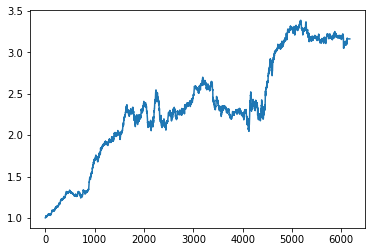

In [16]:
rp_vw_fi_stop_5 = pd.read_csv("../distance_results/stop_5/Rp_vw_fi.csv")
rp_vw_fi_cum_stop_5 = np.cumprod(1+rp_vw_fi_stop_5['Return'])
rp_vw_fi_cum_stop_5.plot()

In [17]:
operations_stop_7 = pd.read_csv("../distance_results/stop_7/operations.csv", index_col=0)
operations_stop_7['Return'] = operations_stop_7['Return'] - 1
operations_stop_7.head()

,Semester,Days,S1,S2,Pair,Return,Converged
0,0,33,JCI,1436513D,JCI-1436513D,0.000034,True
1,0,13,JCI,1436513D,JCI-1436513D,0.000067,True
2,0,28,JCI,1436513D,JCI-1436513D,0.000088,True
3,0,9,JCI,1436513D,JCI-1436513D,0.000049,True
4,0,17,JCI,1436513D,JCI-1436513D,0.000052,True


In [49]:
print(f"Número de operações: {np.shape(operations_stop_7)[0]}")
print(f"Converged operations: {100*sum(operations_stop_7['Converged'])/np.shape(operations_stop_7)[0]} | Open operations: {np.shape(operations_stop_7)[0] - sum(operations_stop_7['Converged'])}")
print(f"Positive Returns: {sum(operations_stop_7['Return'] > 0)}")
print(f"Negative Returns: {sum(operations_stop_7['Return'] < 0)}")
print(f"Highest Return: {operations_stop_7['Return'].max()}")
print(f"Lowest Return: {operations_stop_7['Return'].min()}")
print(f"Average Return: {operations_stop_7['Return'].mean()}")
print(f"Average trade lenght: {operations_stop_7['Days'].mean()}")

Número de operações: 3462
Converged operations: 80.79145002888504 | Open operations: 665
Positive Returns: 2403
Negative Returns: 1058
Highest Return: 0.6967173269479958
Lowest Return: -0.06999999999999995
Average Return: 0.006867295631199356
Average trade lenght: 22.362796071634893


In [48]:
# Retorno por par
operations_by_pair_stop_7 = operations_stop_7.groupby("Pair").sum("Return")
print(f"Número de pares: {np.shape(operations_by_pair_stop_7)[0]}")
print(f"Retorno médio por par: {round(100*operations_by_pair_stop_7['Return'].mean(),4)}%")

Número de pares: 640
Retorno médio por par: 3.7148%


In [50]:
operations_stop_10 = pd.read_csv("../distance_results/stop_10/operations.csv", index_col=0)
operations_stop_10['Return'] = operations_stop_10['Return'] - 1
operations_stop_10.head()

,Semester,Days,S1,S2,Pair,Return,Converged
0,0,33,JCI,1436513D,JCI-1436513D,0.000034,True
1,0,13,JCI,1436513D,JCI-1436513D,0.000067,True
2,0,28,JCI,1436513D,JCI-1436513D,0.000088,True
3,0,9,JCI,1436513D,JCI-1436513D,0.000049,True
4,0,17,JCI,1436513D,JCI-1436513D,0.000052,True


In [51]:
print(f"Número de operações: {np.shape(operations_stop_10)[0]}")
print(f"Converged operations: {100*sum(operations_stop_10['Converged'])/np.shape(operations_stop_10)[0]} | Open operations: {np.shape(operations_stop_10)[0] - sum(operations_stop_10['Converged'])}")
print(f"Positive Returns: {sum(operations_stop_10['Return'] > 0)}")
print(f"Negative Returns: {sum(operations_stop_10['Return'] < 0)}")
print(f"Highest Return: {operations_stop_10['Return'].max()}")
print(f"Lowest Return: {operations_stop_10['Return'].min()}")
print(f"Average Return: {operations_stop_10['Return'].mean()}")
print(f"Average trade lenght: {operations_stop_10['Days'].mean()}")

Número de operações: 3171
Converged operations: 79.06023336486912 | Open operations: 664
Positive Returns: 2344
Negative Returns: 826
Highest Return: 0.6967173269479958
Lowest Return: -0.09999999999999998
Average Return: 0.006232500647793972
Average trade lenght: 24.415011037527595


In [52]:
# Retorno por par
operations_by_pair_stop_10 = operations_stop_10.groupby("Pair").sum("Return")
print(f"Número de pares: {np.shape(operations_by_pair_stop_10)[0]}")
print(f"Retorno médio por par: {round(100*operations_by_pair_stop_10['Return'].mean(),4)}%")

Número de pares: 640
Retorno médio por par: 3.088%


In [61]:
operations_sigma_1 = pd.read_csv("../distance_results/threshold_1/operations.csv", index_col=0)
operations_sigma_1['Return'] = operations_sigma_1['Return'] - 1
operations_sigma_1.head()
print(f"Número de operações: {np.shape(operations_sigma_1)[0]}")
print(f"Converged operations: {100*sum(operations_sigma_1['Converged'])/np.shape(operations_sigma_1)[0]} | Open operations: {np.shape(operations_sigma_1)[0] - sum(operations_stop_10['Converged'])}")
print(f"Positive Returns: {sum(operations_sigma_1['Return'] > 0)}")
print(f"Negative Returns: {sum(operations_sigma_1['Return'] < 0)}")
print(f"Highest Return: {operations_sigma_1['Return'].max()}")
print(f"Lowest Return: {operations_sigma_1['Return'].min()}")
print(f"Average Return: {operations_sigma_1['Return'].mean()}")
print(f"Average trade lenght: {operations_sigma_1['Days'].mean()}")
# Retorno por par
operations_sigma_1 = operations_sigma_1.groupby("Pair").sum("Return")
print(f"Número de pares: {np.shape(operations_sigma_1)[0]}")
print(f"Retorno médio por par: {round(100*operations_sigma_1['Return'].mean(),4)}%")

Número de operações: 3429
Converged operations: 78.71099445902595 | Open operations: 922
Positive Returns: 2808
Negative Returns: 621
Highest Return: 0.2444590025207083
Lowest Return: -0.6262606974988025
Average Return: 0.0024740261654948234
Average trade lenght: 25.749781277340333
Número de pares: 642
Retorno médio por par: 1.3214%


In [62]:
operations_sigma_2 = pd.read_csv("../distance_results/threshold_2/operations.csv", index_col=0)
operations_sigma_2['Return'] = operations_sigma_2['Return'] - 1
operations_sigma_2.head()
print(f"Número de operações: {np.shape(operations_sigma_2)[0]}")
print(f"Converged operations: {100*sum(operations_sigma_2['Converged'])/np.shape(operations_sigma_2)[0]} | Open operations: {np.shape(operations_sigma_2)[0] - sum(operations_stop_10['Converged'])}")
print(f"Positive Returns: {sum(operations_sigma_2['Return'] > 0)}")
print(f"Negative Returns: {sum(operations_sigma_2['Return'] < 0)}")
print(f"Highest Return: {operations_sigma_2['Return'].max()}")
print(f"Lowest Return: {operations_sigma_2['Return'].min()}")
print(f"Average Return: {operations_sigma_2['Return'].mean()}")
print(f"Average trade lenght: {operations_sigma_2['Days'].mean()}")
# Retorno por par
operations_sigma_2 = operations_sigma_2.groupby("Pair").sum("Return")
print(f"Número de pares: {np.shape(operations_sigma_2)[0]}")
print(f"Retorno médio por par: {round(100*operations_sigma_2['Return'].mean(),4)}%")

Número de operações: 2157
Converged operations: 71.256374594344 | Open operations: -350
Positive Returns: 1647
Negative Returns: 510
Highest Return: 0.2259076305200185
Lowest Return: -0.6163038130033693
Average Return: 0.004344958525105989
Average trade lenght: 30.835419564209552
Número de pares: 635
Retorno médio por par: 1.4759%


In [78]:
operations_by_period = {}
for index, row in operations.iterrows():
    period = int(row['Days']/10)
    positive_return = row['Return'] >= 0
    operation_return = row['Return']
    if period not in operations_by_period:
        operations_by_period[period] = {"positive": 0, "negative": 0, "return": 0}
    
    if positive_return:
        operations_by_period[period]['positive'] += 1
    else:
        operations_by_period[period]['negative'] += 1
            
    operations_by_period[period]['return'] += operation_return
        
pd.DataFrame(operations_by_period).to_csv("operations_period.csv")

In [88]:
operations_day_limit = pd.read_csv("../distance_results/duration_limit/operations.csv", index_col=0)
operations_day_limit['Return'] = operations_day_limit['Return'] - 1
operations_day_limit.head()
print(f"Número de operações: {np.shape(operations_day_limit)[0]}")
print(f"Converged operations: {100*sum(operations_day_limit['Converged'])/np.shape(operations_day_limit)[0]} | Open operations: {np.shape(operations_day_limit)[0] - sum(operations_day_limit['Converged'])}")
print(f"Positive Returns: {sum(operations_day_limit['Return'] > 0)}")
print(f"Negative Returns: {sum(operations_day_limit['Return'] < 0)}")
print(f"Highest Return: {operations_day_limit['Return'].max()}")
print(f"Lowest Return: {operations_day_limit['Return'].min()}")
print(f"Average Return: {operations_day_limit['Return'].mean()}")
print(f"Average trade lenght: {operations_day_limit['Days'].mean()}")
# Retorno por par
operations_day_limit = operations_day_limit.groupby("Pair").sum("Return")
print(f"Número de pares: {np.shape(operations_day_limit)[0]}")
print(f"Retorno médio por par: {round(100*operations_day_limit['Return'].mean(),4)}%")

Número de operações: 2745
Converged operations: 70.60109289617486 | Open operations: 807
Positive Returns: 2088
Negative Returns: 657
Highest Return: 0.2444590025207083
Lowest Return: -0.5396204931710378
Average Return: 0.004047381216443691
Average trade lenght: 20.289253187613845
Número de pares: 640
Retorno médio por par: 1.7359%


Compound interest rate is 2.157788440552963 %


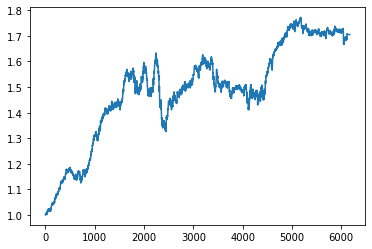

In [87]:
def rate_interest(principal, final_amount, time):
    rate = (100 * (final_amount/principal)**(1/time)) - 100
    print("Compound interest rate is", rate, "%")

cumulative = np.cumprod(1+daily_returns_cc['Return'])
cumulative.plot()
rate_interest(1,cumulative.values[-1],25)

In [58]:
from datetime import date

d0 = date(1991, 8, 1)
d1 = date(2015, 7, 1)
days = np.busday_count( d0, d1 )
print(days)

6239
